In [1]:
%run F1_functions.ipynb

/Users/dianaow/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [109]:
train_set = read_from_pickle(directory, "train_set.pickle")
test_set = read_from_pickle(directory, "test_set.pickle")
status_dataset_no_agg = read_from_pickle(directory, "status_dataset_no_agg.pickle")

In [110]:
status_dataset = pd.concat([train_set, test_set])

In [3]:
index_list = ['year', 'name', 'driverRef']
target_var_list = ['statusId']

## Class distribution for each race

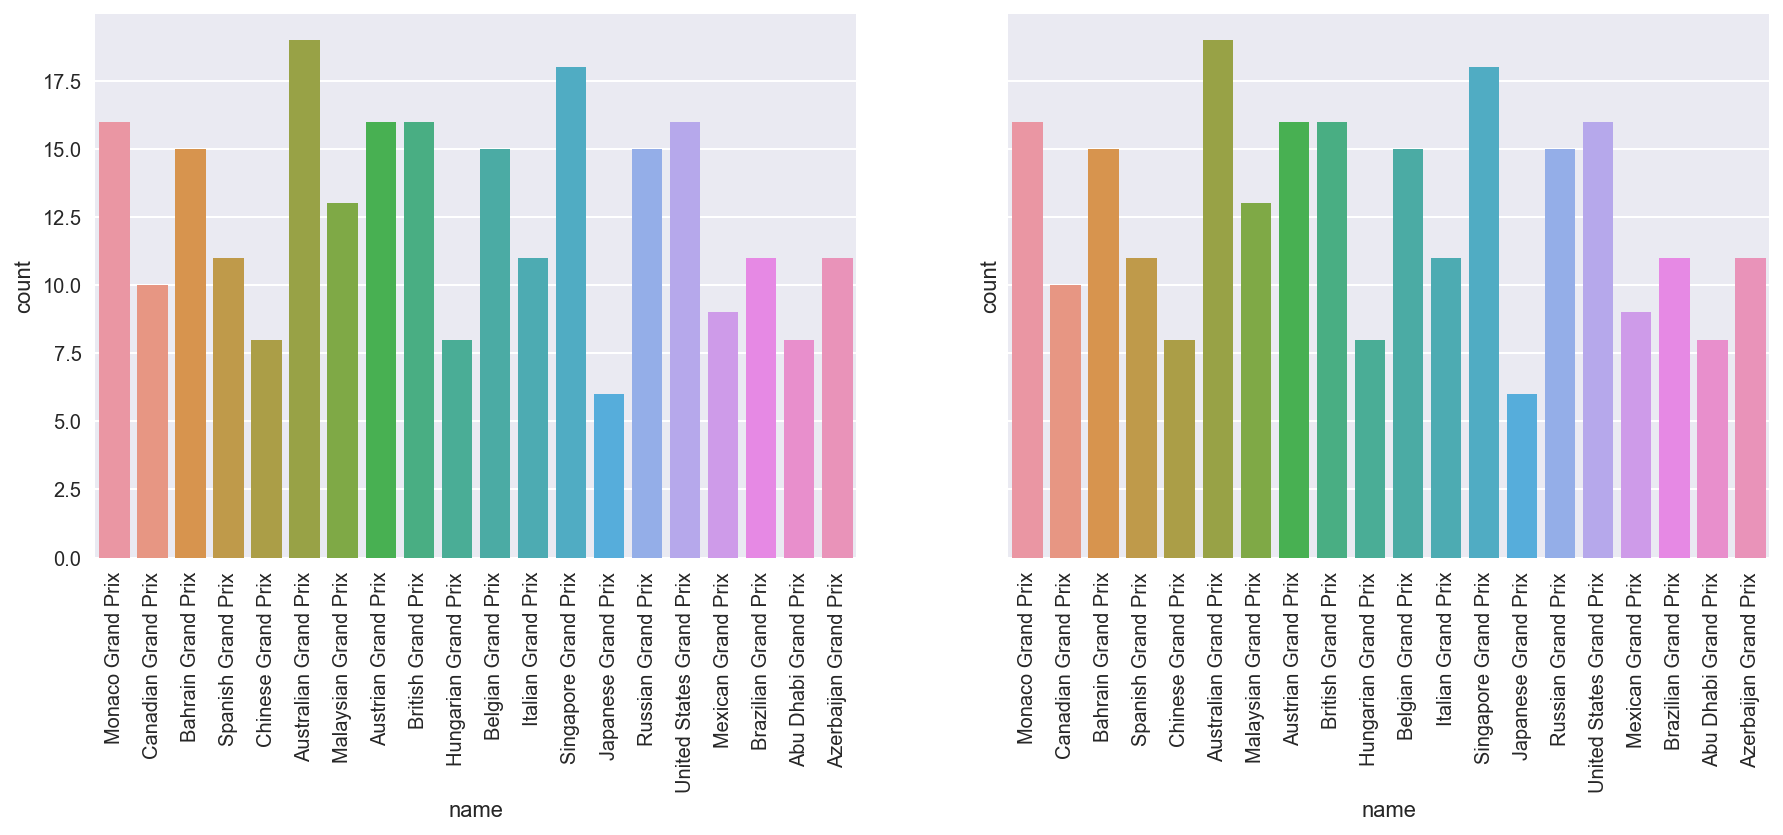

In [111]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))
dnf16 = status_dataset_no_agg[(status_dataset_no_agg['statusId'] == 0)]
dnf17 = status_dataset_no_agg[(status_dataset_no_agg['statusId'] == 0)]
sns.countplot(x="name", data=dnf16, ax=ax[0])
sns.countplot(x="name", data=dnf17, ax=ax[1])
for ax in fig.axes:
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)
fig.show()

## Trend of features over the seasons (2015-2017)

#### Comparison of drivers' pitstop timings from 2016 to 2017

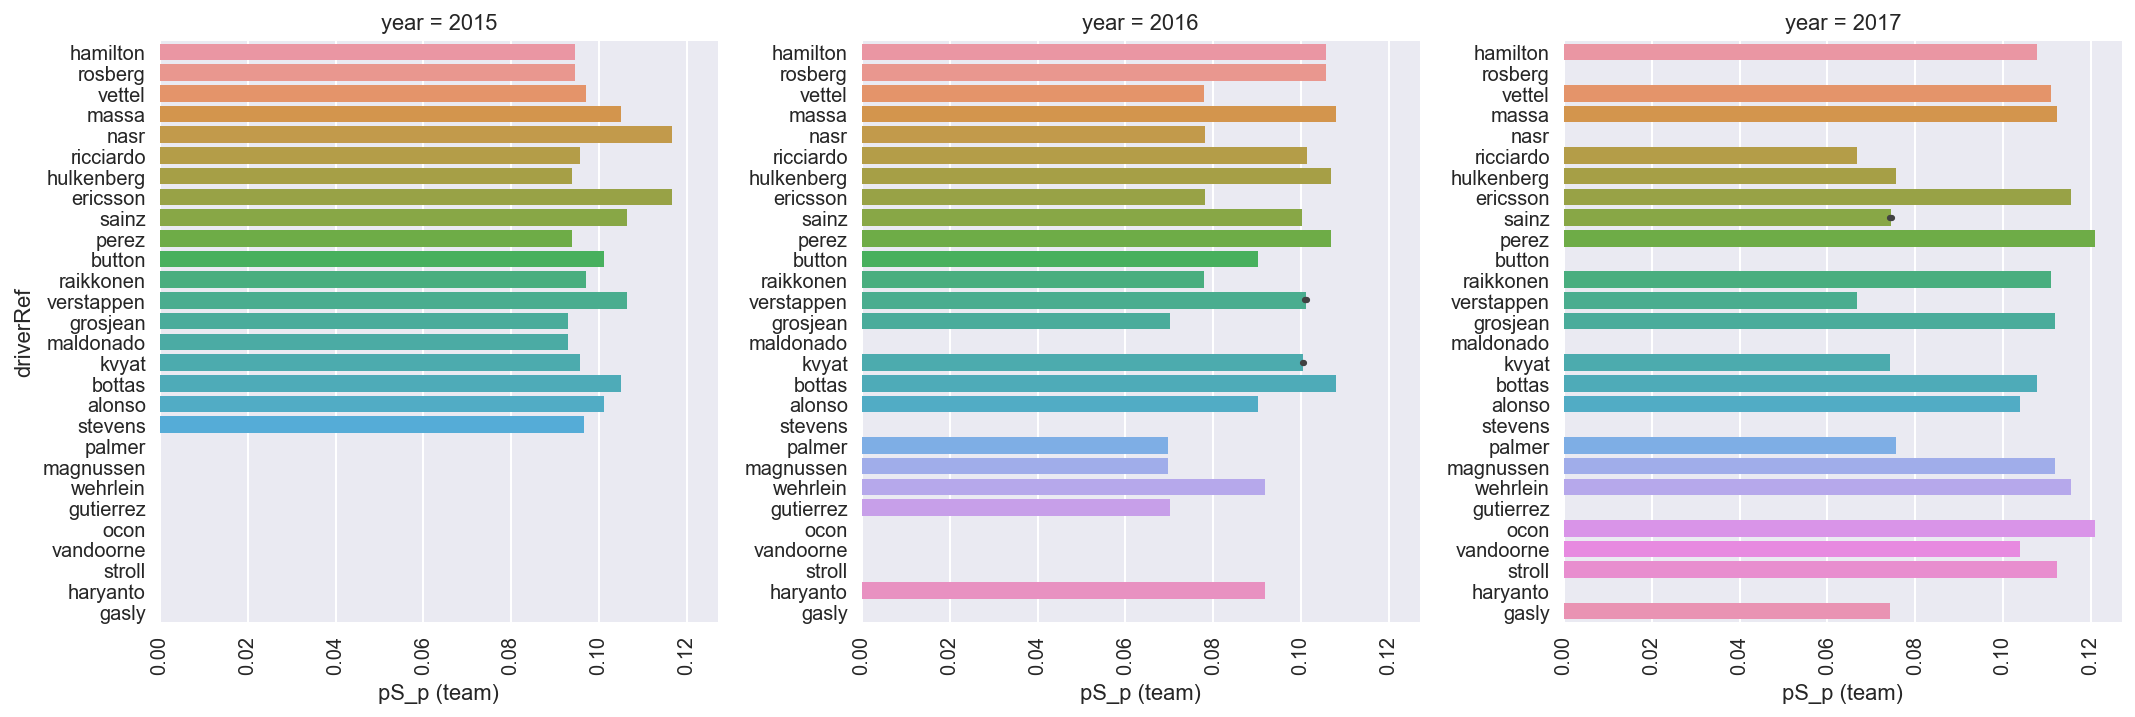

In [117]:
sns.set(font_scale=1)
g = sns.factorplot(x="pS_p (team)", y='driverRef', col='year', kind="bar", orient='h',
                   data=status_dataset_no_agg, size=5, aspect=1)
g.set_xticklabels(rotation=90)

#### Comparison of track's pitstop timings from 2016 to 2017

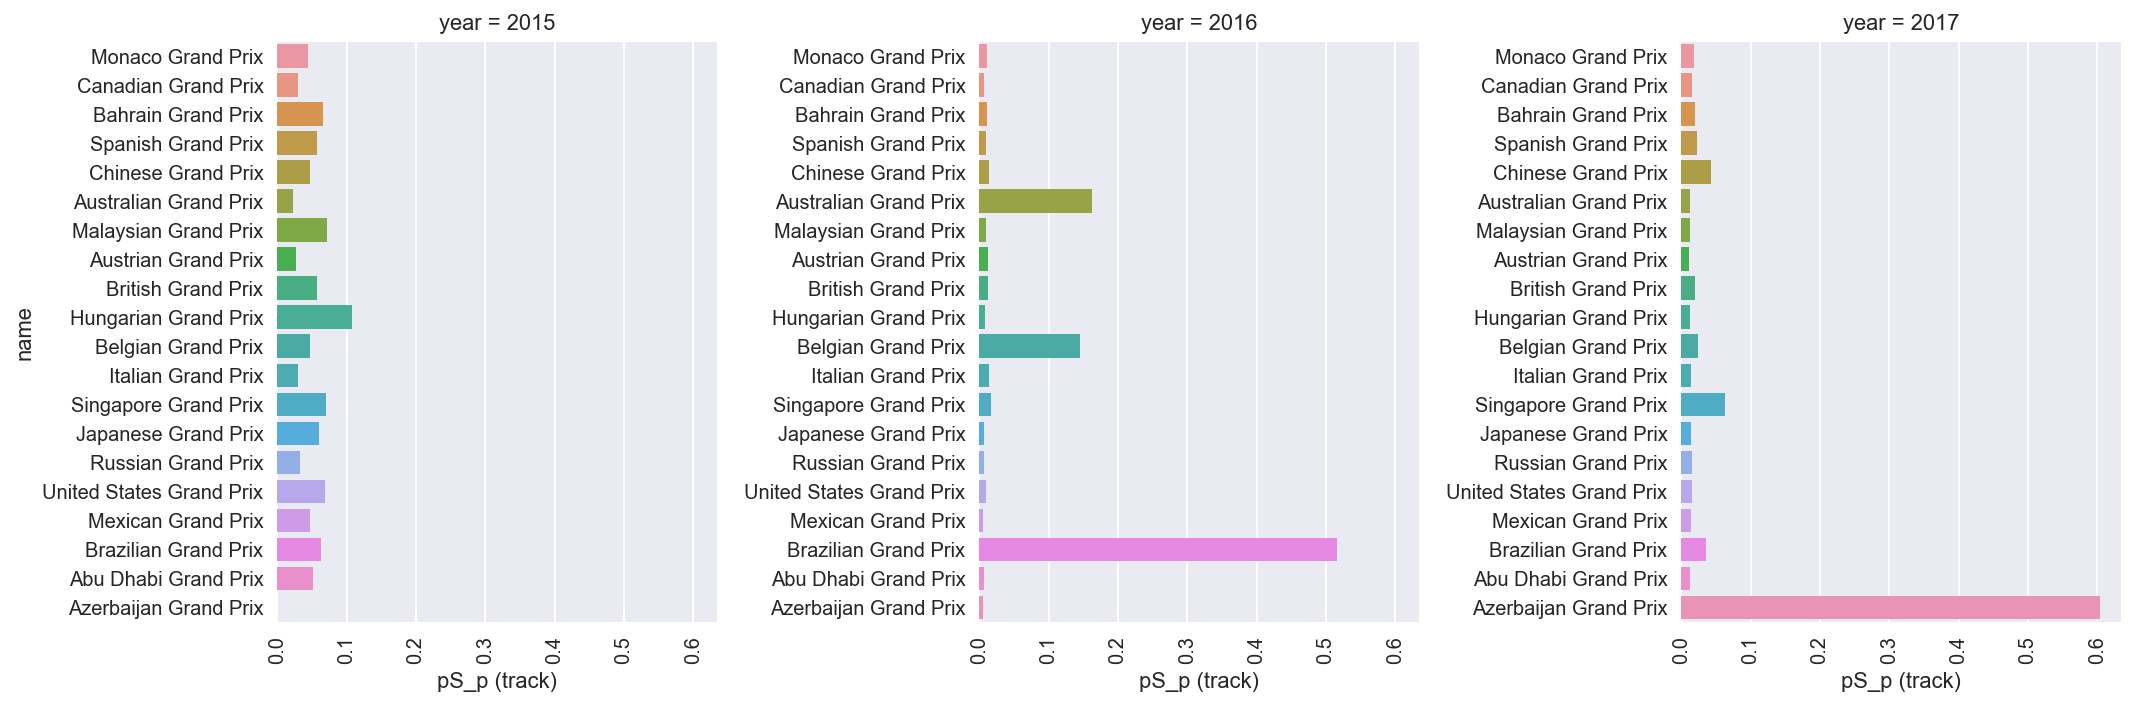

In [120]:
sns.set(font_scale=1)
g = sns.factorplot(y='name', x="pS_p (track)", col='year', kind="bar", orient='h',
                   data=status_dataset_no_agg, size=5, aspect=1)

#### Comparison of drivers' overtaking rate

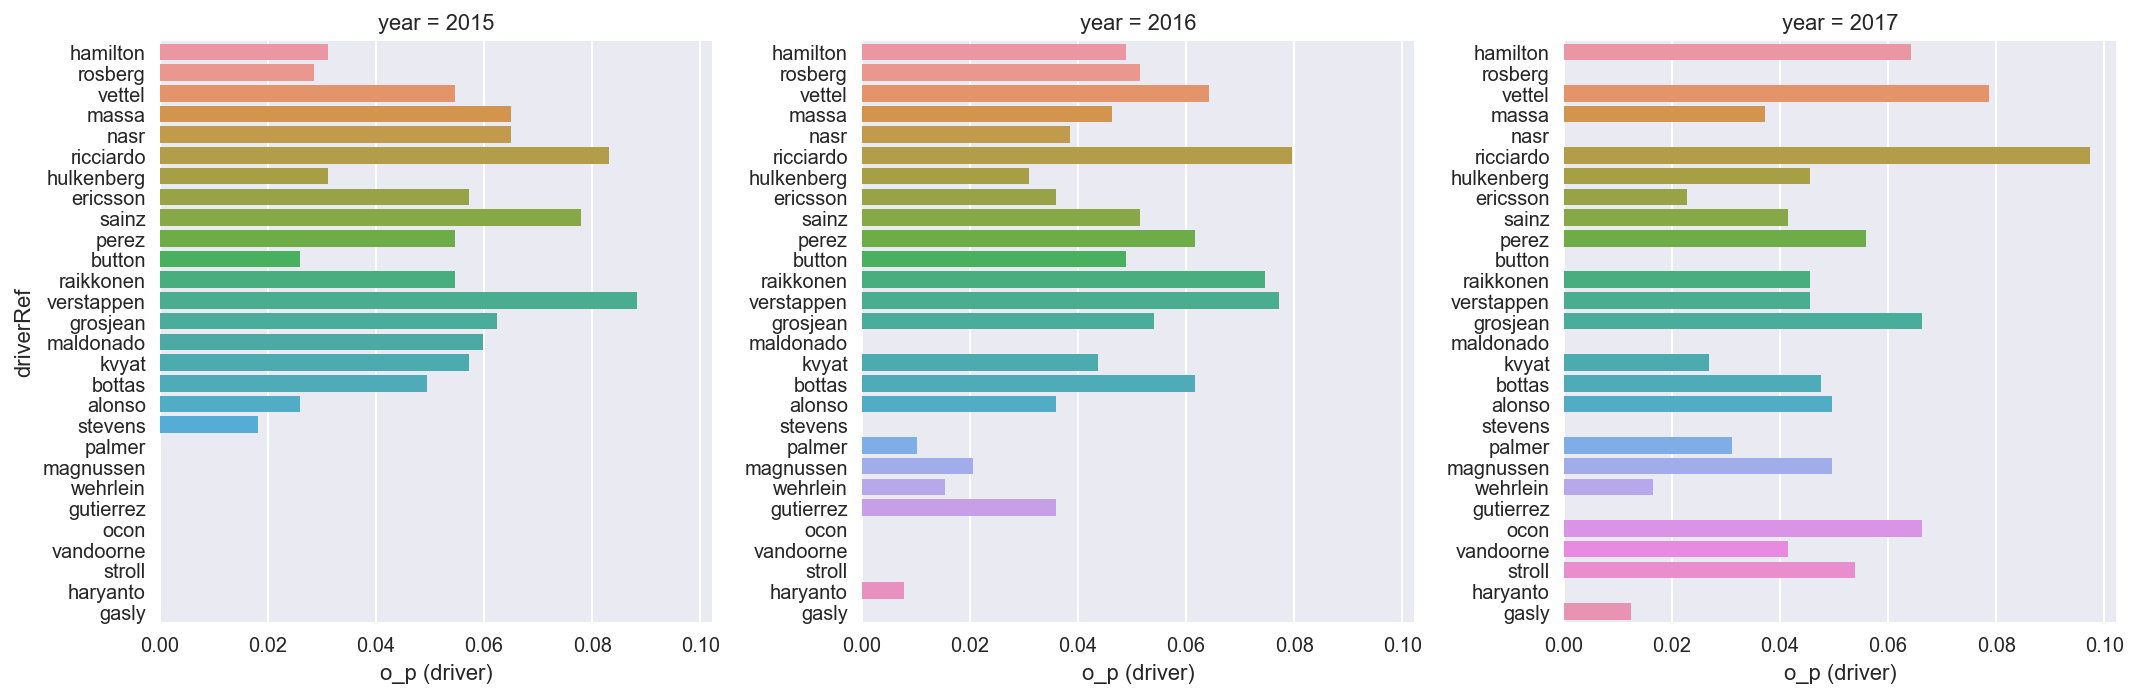

In [122]:
sns.set(font_scale=1)
g = sns.factorplot(y='driverRef', x="o_p (driver)", col='year', kind="bar", orient='h',
                   data=status_dataset_no_agg, size=5, aspect=1)

#### Comparison of track's overtaking rate from 2016 to 2017

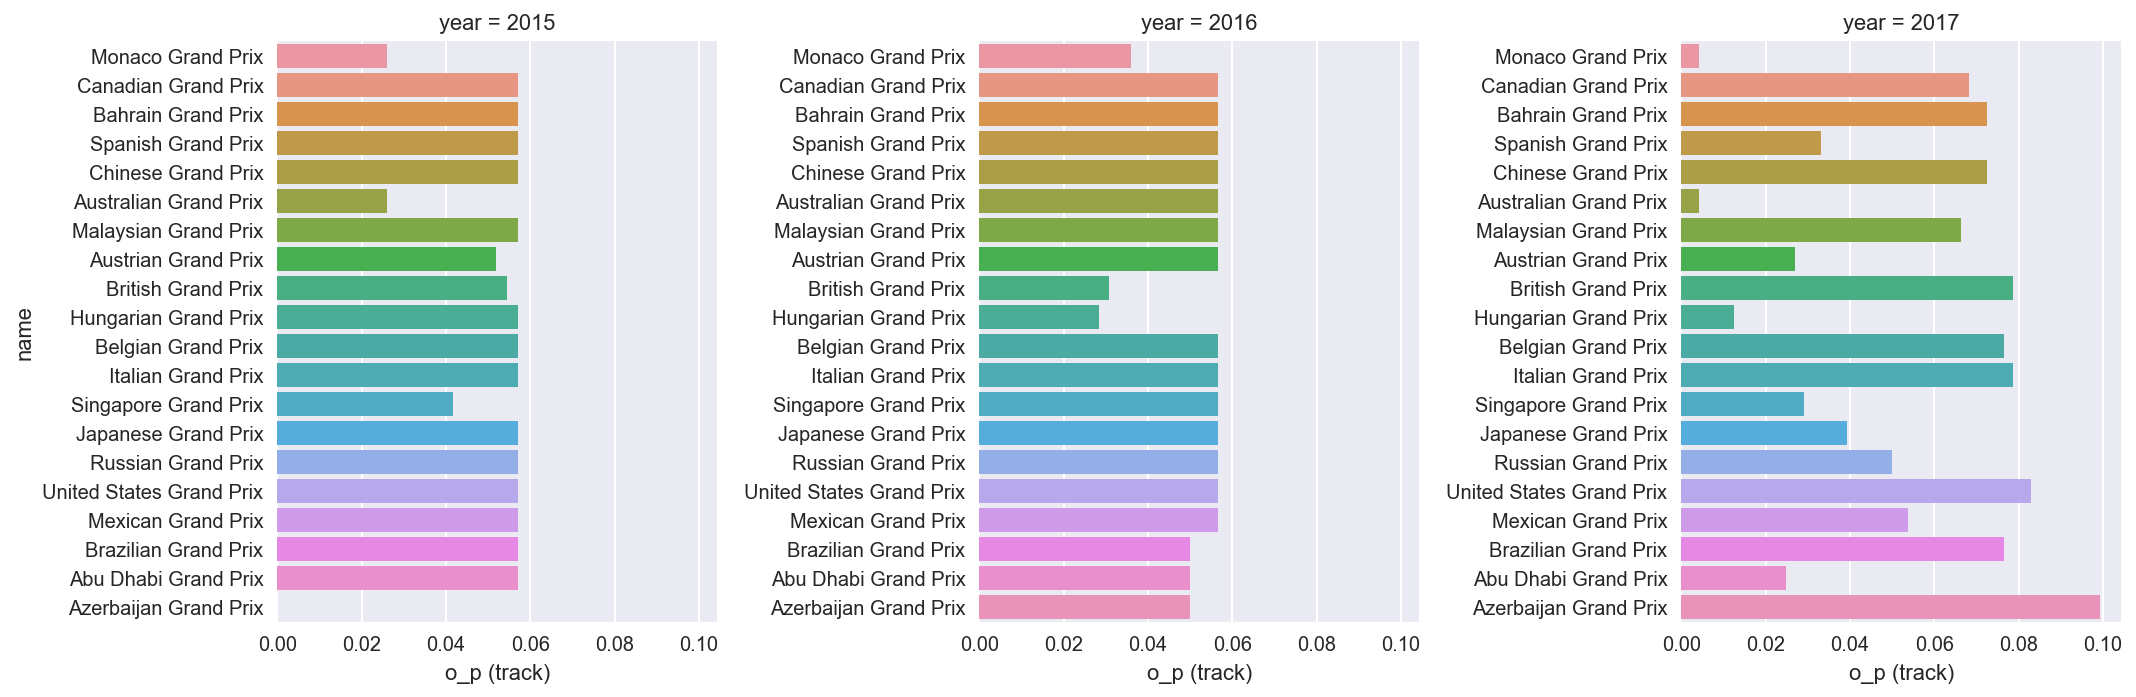

In [124]:
sns.set(font_scale=1)
g = sns.factorplot(y='name', x="o_p (track)", col='year', kind="bar", orient='h',
                   data=status_dataset_no_agg, size=5, aspect=1)

## How well do the predictors relate to the target variable?

In [91]:
df = status_dataset.drop(index_list, axis=1)

In [92]:
# Only select columns with continuous and ordinal variables
df_cont = df[['position', 'Medium', 'Soft', 'Super Soft', 'Soft', 'Ultra soft', 'Hard', 
              'pS_p (team)', 'pS_p (track)', 'o_p (driver)', 'o_p (track)', 'statusId']].reset_index(drop=True)

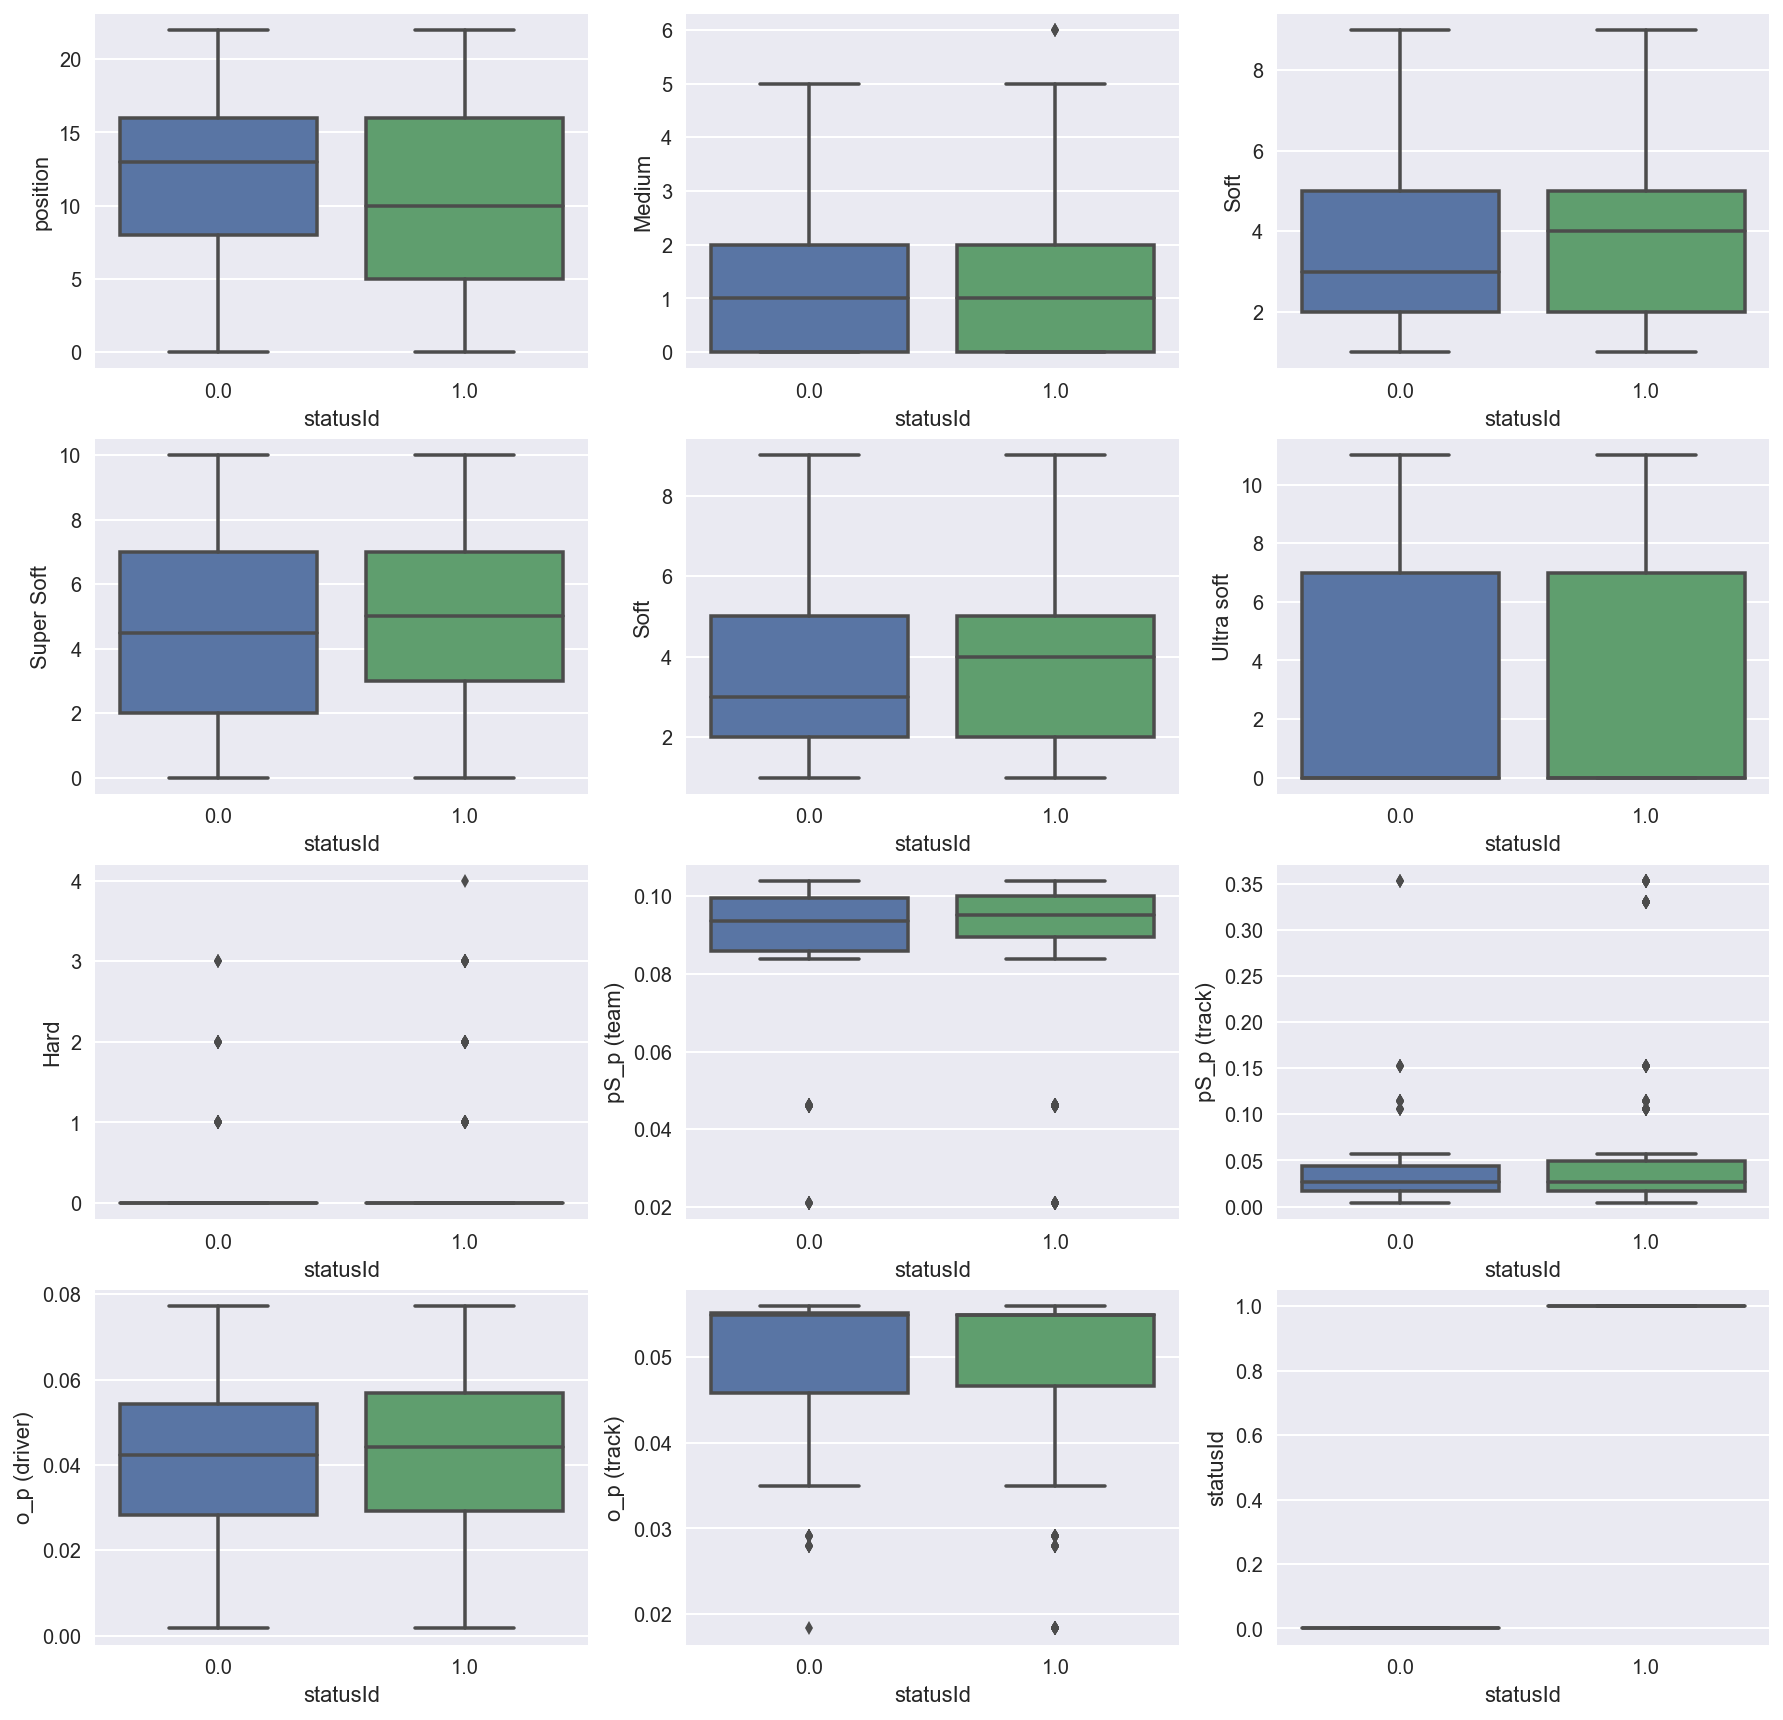

In [93]:
nrows = len(df_cont.columns)//3
ncols = 3

fig, axes = plt.subplots(nrows, ncols, figsize=(15,15))

i=0
for row in range(nrows):
    for col in range(ncols):
        g = sns.boxplot(y=df_cont.iloc[:,i], x=df_cont['statusId'], ax=axes[row][col])
        i=i+1

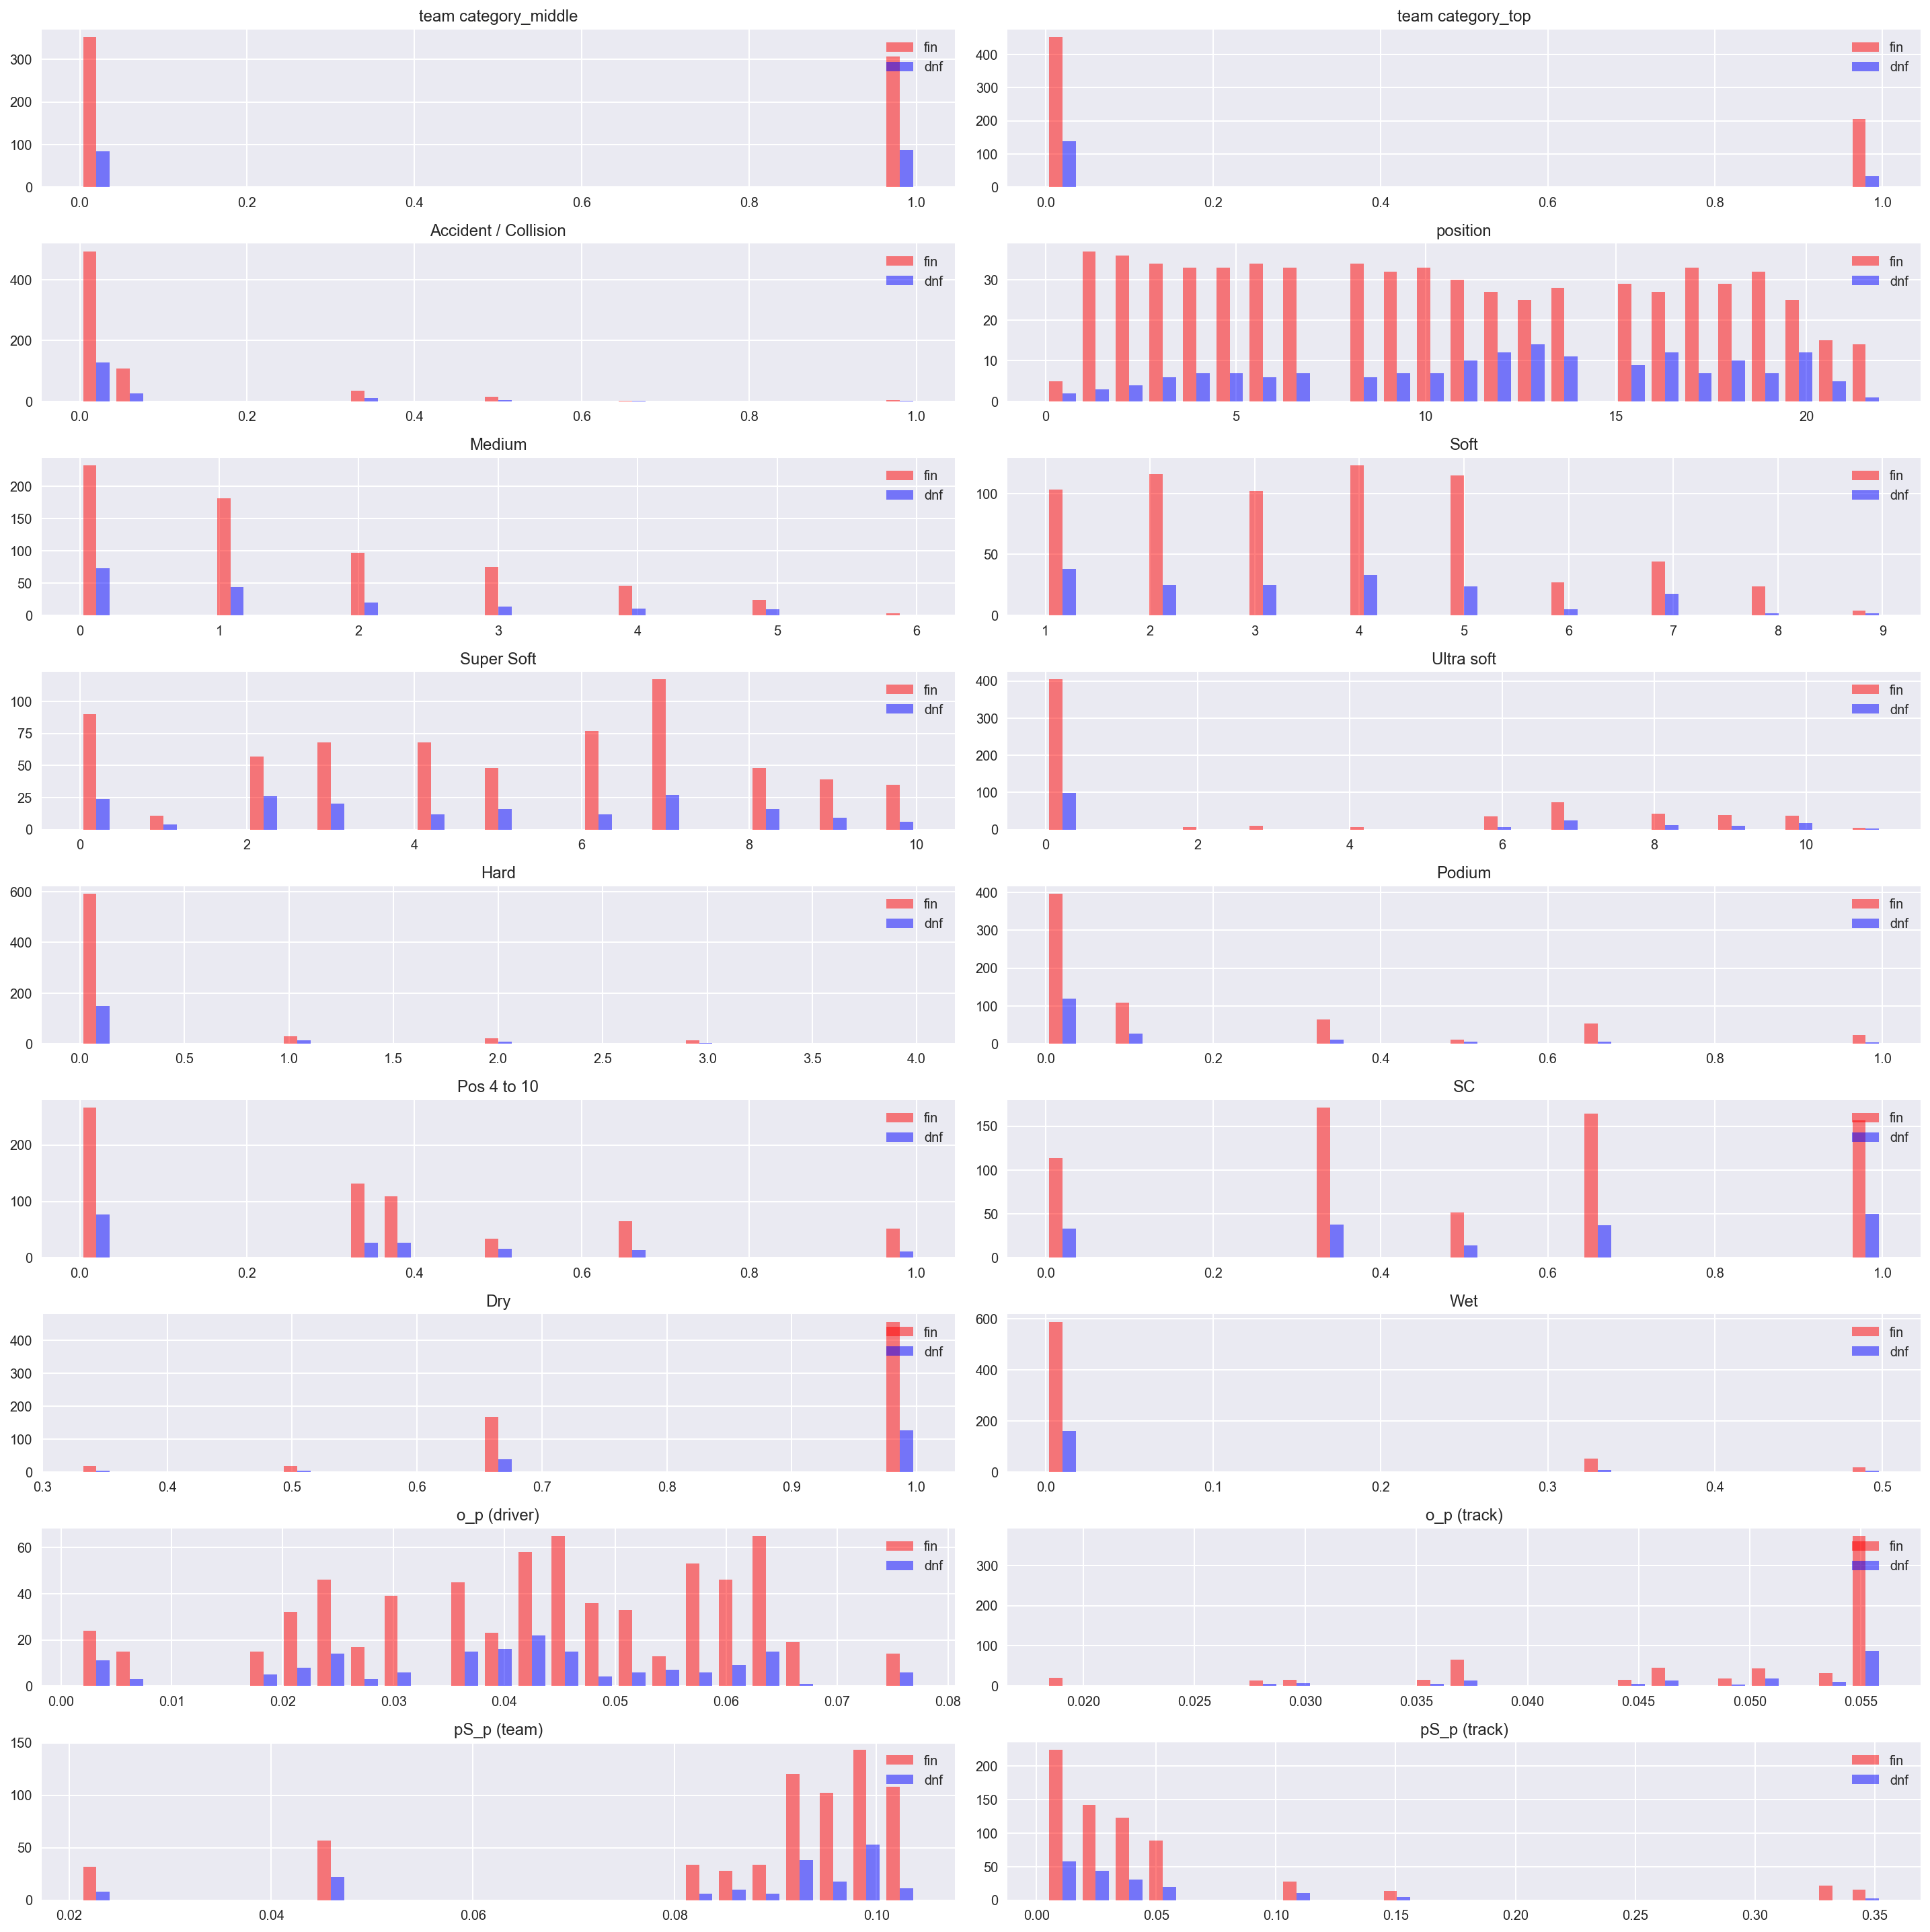

In [103]:
def sephist(col):
    yes = df[df['statusId'] == 1][col]
    no = df[df['statusId'] == 0][col]
    return yes, no

plt.figure(figsize=(20,20))
for num in range(len(df.columns)-1):
    plt.subplot(len(df.columns)//2, 2, num+1)
    plt.hist((sephist(df.iloc[:,num].name)[0], sephist(df.iloc[:,num].name)[1]), bins=25, alpha=0.5, label=['fin', 'dnf'], color=['r', 'b'])
    plt.legend(loc='upper right')
    plt.title(df.iloc[:,num].name)
plt.tight_layout(pad=0.8, w_pad=0.8, h_pad=1.0)

In [100]:
SS = StandardScaler()

df_no_tar = status_dataset.drop(index_list+target_var_list, axis=1)
Xs_train = pd.DataFrame(SS.fit_transform(df_no_tar))
Xs_train.columns = df_no_tar.columns

Xs_train_new = pd.concat([Xs_train.reset_index(drop=True), status_dataset[target_var_list].reset_index(drop=True)], axis=1)

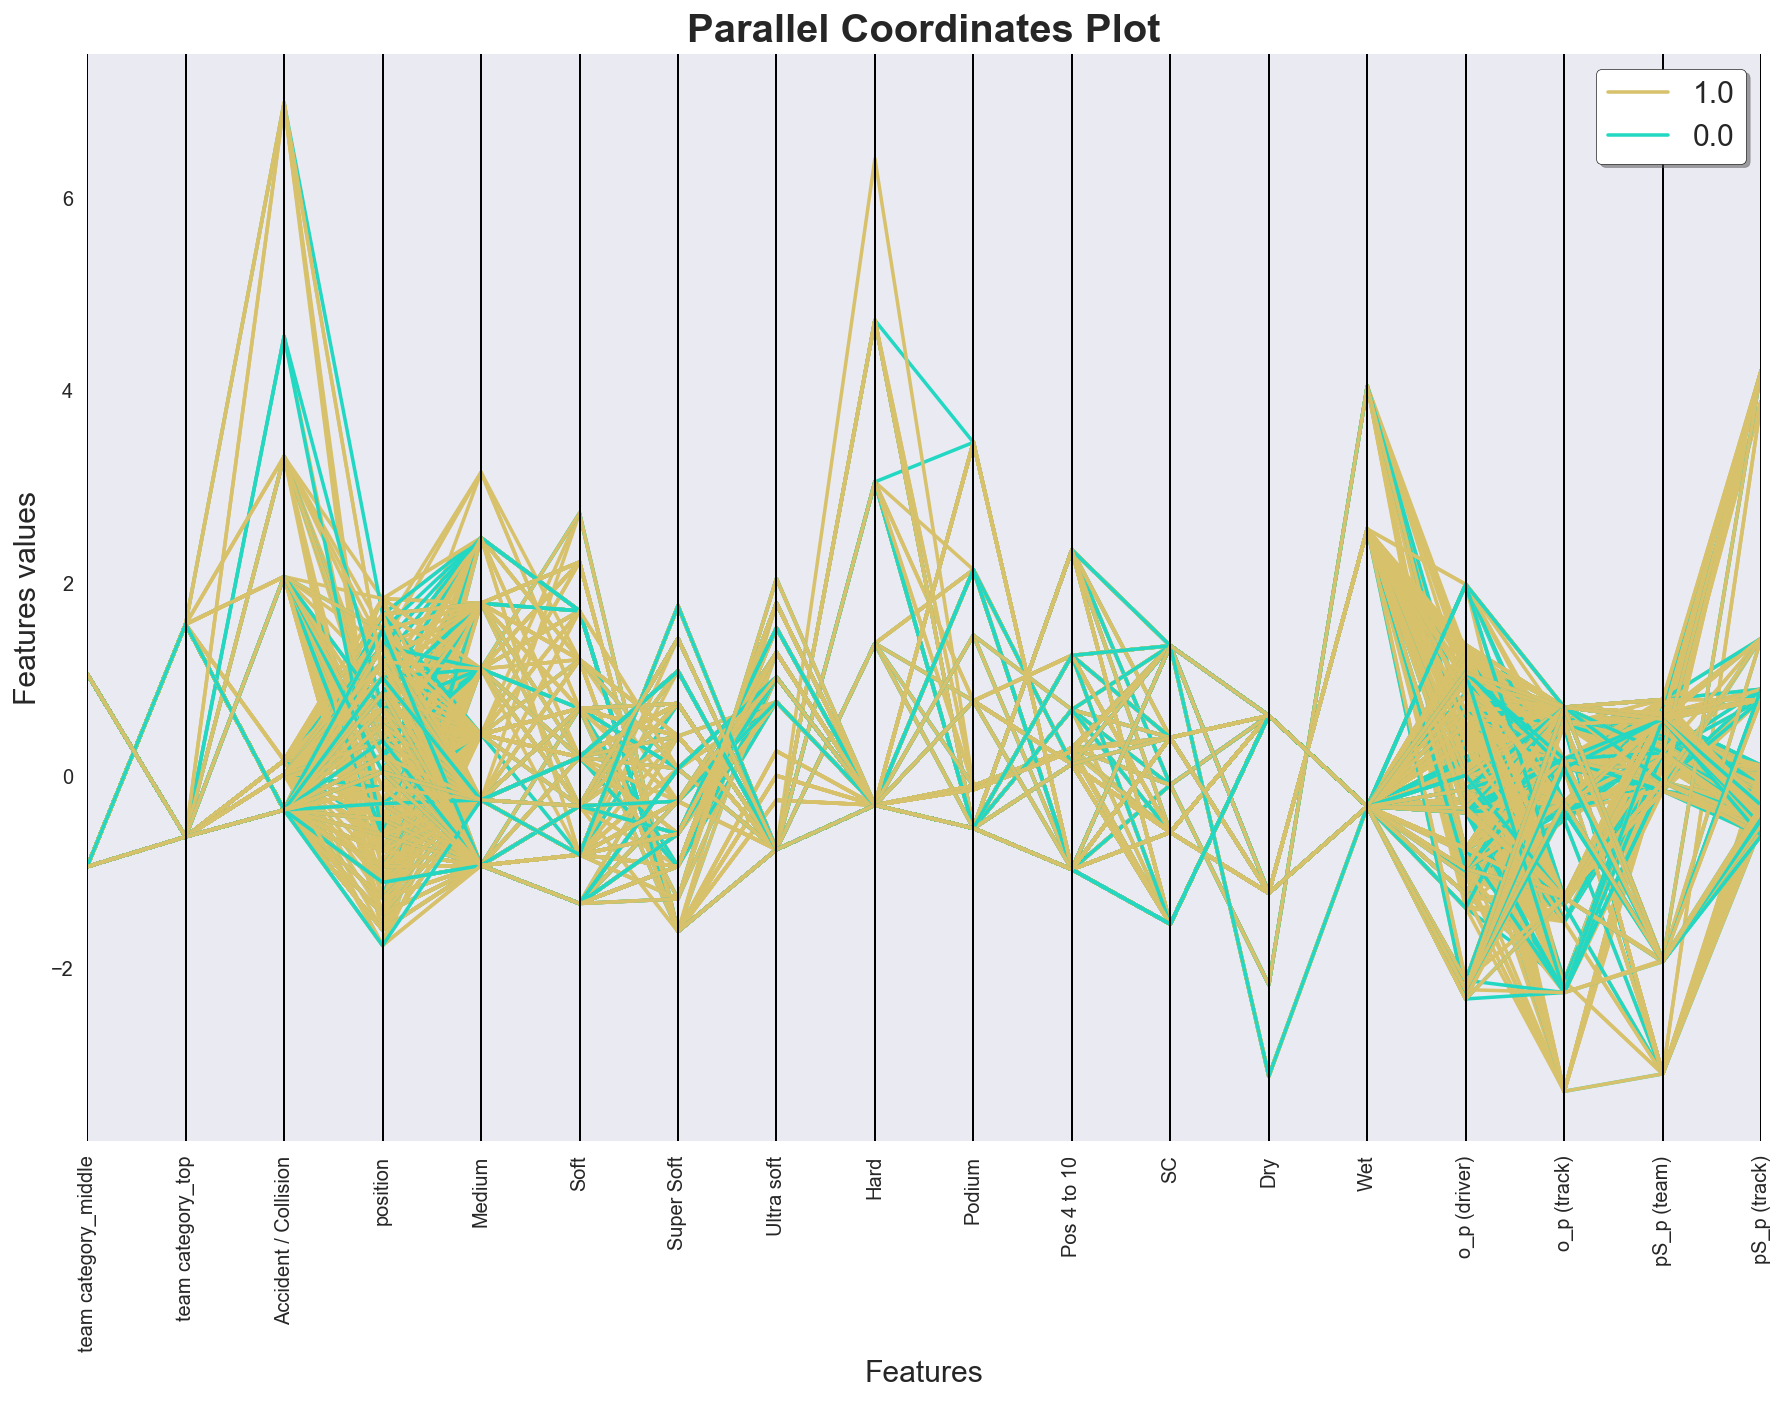

In [101]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(Xs_train_new, "statusId")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.xticks(rotation=90)
plt.show()

In [15]:
from pandas.tools.plotting import radviz

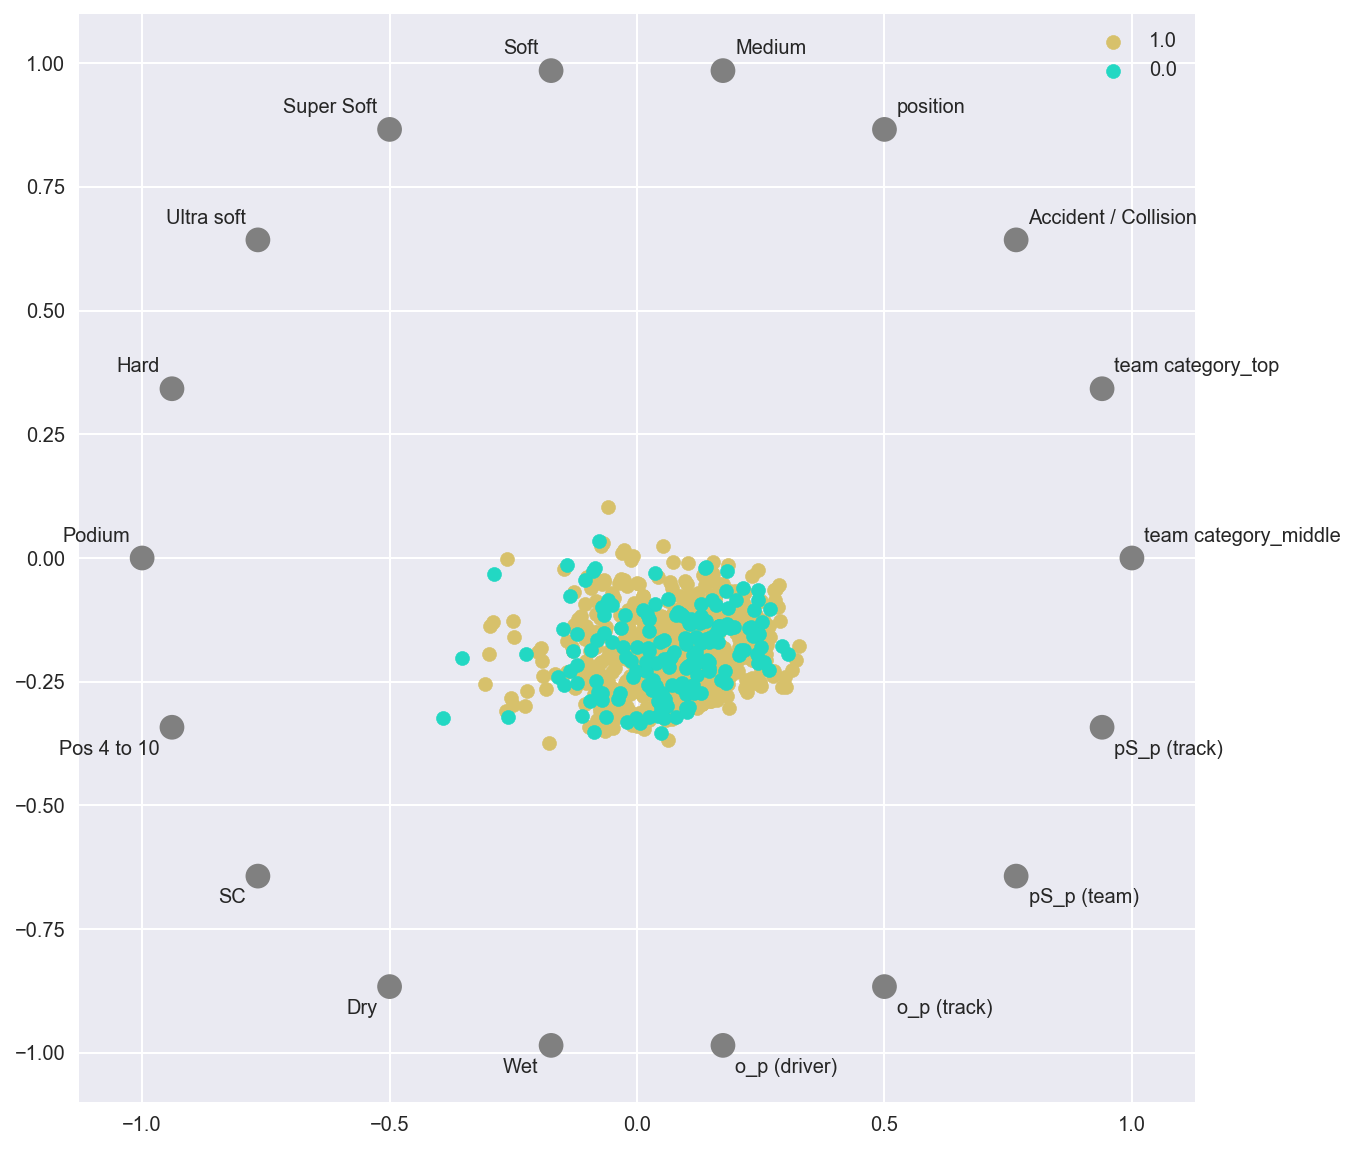

In [102]:
plt.figure(figsize=(10,10))
radviz(df, 'statusId')
plt.show()